In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
edu=pd.read_csv('학교급_및_시도별__학생_1인당_월평균_사교육비_20210824152624.csv',
               encoding='euc-kr')

edu.head()

,시도별,2012,2012.1,2012.2,2012.3,2012.4,2013,2013.1,2013.2,2013.3,...,2018,2018.1,2018.2,2018.3,2018.4,2019,2019.1,2019.2,2019.3,2019.4
0,시도별,평 균 (만원),초등학교 (만원),중학교 (만원),고등학교 (만원),일반고 (만원),평 균 (만원),초등학교 (만원),중학교 (만원),고등학교 (만원),...,평 균 (만원),초등학교 (만원),중학교 (만원),고등학교 (만원),일반고 (만원),평 균 (만원),초등학교 (만원),중학교 (만원),고등학교 (만원),일반고 (만원)
1,전 체,23.6,21.9,27.6,22.4,26.5,23.9,23.2,26.7,22.3,...,29.1,26.3,31.2,32.1,37.6,32.1,29,33.8,36.5,42.5
2,서 울,31.2,26.1,34,36.1,41.1,32.8,28.4,34.9,37.1,...,41.1,36.5,41.5,48.4,56.6,45.1,38.5,46.3,55.6,65.2
3,부 산,23,21.3,28.1,20.8,25.6,22.9,19.3,27,24,...,27.6,24.1,31.6,30.2,37.1,31.6,28.8,32.5,36,44.2
4,대 구,24.8,24,28.5,22.5,26.8,24.2,21.9,26.7,24.9,...,30.3,27.7,33.2,31.8,38.2,32.9,29.5,34.2,37.5,45.4


In [3]:
edu[edu['시도별'].isnull()]

,시도별,2012,2012.1,2012.2,2012.3,2012.4,2013,2013.1,2013.2,2013.3,...,2018,2018.1,2018.2,2018.3,2018.4,2019,2019.1,2019.2,2019.3,2019.4


In [4]:
edu=edu.drop(['2012.1','2012.2','2012.3','2012.4','2013.1','2013.2','2013.3','2013.4','2014.1','2014.2','2014.3','2014.4','2015.1','2015.2','2015.3','2015.4','2016.1','2016.2','2016.3','2016.4','2017.1','2017.2','2017.3','2017.4','2018.1','2018.2','2018.3','2018.4','2019.1','2019.2','2019.3','2019.4'], axis='columns')
edu.head()

,시도별,2012,2013,2014,2015,2016,2017,2018,2019
0,시도별,평 균 (만원),평 균 (만원),평 균 (만원),평 균 (만원),평 균 (만원),평 균 (만원),평 균 (만원),평 균 (만원)
1,전 체,23.6,23.9,24.2,24.4,25.6,27.2,29.1,32.1
2,서 울,31.2,32.8,33.5,33.8,35.2,39.1,41.1,45.1
3,부 산,23,22.9,22.7,23.4,25.6,27.6,27.6,31.6
4,대 구,24.8,24.2,24.2,24.4,26.5,30,30.3,32.9


In [5]:
edu=edu.drop([0,1])
edu.head()

,시도별,2012,2013,2014,2015,2016,2017,2018,2019
2,서 울,31.2,32.8,33.5,33.8,35.2,39.1,41.1,45.1
3,부 산,23,22.9,22.7,23.4,25.6,27.6,27.6,31.6
4,대 구,24.8,24.2,24.2,24.4,26.5,30,30.3,32.9
5,인 천,20.3,20.8,21.1,21.3,23.2,25.1,27.7,31.3
6,광 주,23.1,23.9,23.1,22.8,22.8,24.5,26.2,27.6


In [6]:
edu.to_csv('지역별 및 학급별 사교육비 데이터.csv',
          encoding='euc-kr')

### 상관분석 진행 - 피어슨 상관계수 사용
- 값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계
- 값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계
- 값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계
- 값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계
- 값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계
- 값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계
- 값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계

In [7]:
apt=pd.read_csv('부동산 년도별.csv',
               encoding='euc-kr')
apt.head()

,지역,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,서울,470912.3333,447892.0000,445022.5000,454295.8333,468677.5000,484823.0000,576621.5000,647371.0833,693632.1667,744852.7143
1,경기,268512.9167,255674.5000,260287.4167,263318.0000,270389.8333,276020.3333,300697.0833,319955.6667,357853.0833,411719.8571
2,인천,190322.5000,182960.5833,189538.5833,193661.5000,196058.9167,200360.4167,214859.9167,226395.4167,257562.7500,294917.1429
3,부산,192383.8333,187918.5833,190090.0833,196434.3333,204957.2500,216682.8333,247442.3333,246349.0000,261897.8333,302229.5714
4,대구,165820.6667,173595.7500,188890.8333,214495.4167,231217.5833,235100.6667,266624.6667,286268.4167,301799.8333,338705.0000


In [8]:
edu=edu.transpose()
edu

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
시도별,서 울,부 산,대 구,인 천,광 주,대 전,울 산,세 종,경 기,강 원,충 북,충 남,전 북,전 남,경 북,경 남,제 주
2012,31.2,23,24.8,20.3,23.1,24.3,22.4,-,24.9,18.2,17.7,17.7,17.9,17.2,19.5,21.2,20.3
2013,32.8,22.9,24.2,20.8,23.9,25.9,22.4,-,25.3,17.2,18.8,17.4,17.5,16.8,18.7,20.8,19.6
2014,33.5,22.7,24.2,21.1,23.1,25.7,22.2,18.6,26,16.7,18.8,18.1,18.3,16.4,19.1,20.3,19.9
2015,33.8,23.4,24.4,21.3,22.8,25.4,21.9,19.6,26.5,17.1,19,18,18.6,16.5,19,20.4,20.1
2016,35.2,25.6,26.5,23.2,22.8,25.7,23.9,23.7,27.9,18.4,19.7,17.7,19.4,16.2,19.3,20.9,22.6
2017,39.1,27.6,30,25.1,24.5,27.6,23.6,26.2,28.7,20.3,19,18.8,20.3,15.8,20.6,22.1,22.4
2018,41.1,27.6,30.3,27.7,26.2,27,26.5,28.8,32.1,20.5,24.4,18.7,20.9,19,21.4,22.6,23.2
2019,45.1,31.6,32.9,31.3,27.6,31.1,27.4,34.1,35.8,22,24.3,23.7,23.9,18.1,22.5,24.8,25.8


In [9]:
edu=edu.rename(columns=edu.iloc[0])
edu

,서 울,부 산,대 구,인 천,광 주,대 전,울 산,세 종,경 기,강 원,충 북,충 남,전 북,전 남,경 북,경 남,제 주
시도별,서 울,부 산,대 구,인 천,광 주,대 전,울 산,세 종,경 기,강 원,충 북,충 남,전 북,전 남,경 북,경 남,제 주
2012,31.2,23,24.8,20.3,23.1,24.3,22.4,-,24.9,18.2,17.7,17.7,17.9,17.2,19.5,21.2,20.3
2013,32.8,22.9,24.2,20.8,23.9,25.9,22.4,-,25.3,17.2,18.8,17.4,17.5,16.8,18.7,20.8,19.6
2014,33.5,22.7,24.2,21.1,23.1,25.7,22.2,18.6,26,16.7,18.8,18.1,18.3,16.4,19.1,20.3,19.9
2015,33.8,23.4,24.4,21.3,22.8,25.4,21.9,19.6,26.5,17.1,19,18,18.6,16.5,19,20.4,20.1
2016,35.2,25.6,26.5,23.2,22.8,25.7,23.9,23.7,27.9,18.4,19.7,17.7,19.4,16.2,19.3,20.9,22.6
2017,39.1,27.6,30,25.1,24.5,27.6,23.6,26.2,28.7,20.3,19,18.8,20.3,15.8,20.6,22.1,22.4
2018,41.1,27.6,30.3,27.7,26.2,27,26.5,28.8,32.1,20.5,24.4,18.7,20.9,19,21.4,22.6,23.2
2019,45.1,31.6,32.9,31.3,27.6,31.1,27.4,34.1,35.8,22,24.3,23.7,23.9,18.1,22.5,24.8,25.8


In [10]:
edu=edu.drop(['시도별'])
edu

,서 울,부 산,대 구,인 천,광 주,대 전,울 산,세 종,경 기,강 원,충 북,충 남,전 북,전 남,경 북,경 남,제 주
2012,31.2,23,24.8,20.3,23.1,24.3,22.4,-,24.9,18.2,17.7,17.7,17.9,17.2,19.5,21.2,20.3
2013,32.8,22.9,24.2,20.8,23.9,25.9,22.4,-,25.3,17.2,18.8,17.4,17.5,16.8,18.7,20.8,19.6
2014,33.5,22.7,24.2,21.1,23.1,25.7,22.2,18.6,26,16.7,18.8,18.1,18.3,16.4,19.1,20.3,19.9
2015,33.8,23.4,24.4,21.3,22.8,25.4,21.9,19.6,26.5,17.1,19,18,18.6,16.5,19,20.4,20.1
2016,35.2,25.6,26.5,23.2,22.8,25.7,23.9,23.7,27.9,18.4,19.7,17.7,19.4,16.2,19.3,20.9,22.6
2017,39.1,27.6,30,25.1,24.5,27.6,23.6,26.2,28.7,20.3,19,18.8,20.3,15.8,20.6,22.1,22.4
2018,41.1,27.6,30.3,27.7,26.2,27,26.5,28.8,32.1,20.5,24.4,18.7,20.9,19,21.4,22.6,23.2
2019,45.1,31.6,32.9,31.3,27.6,31.1,27.4,34.1,35.8,22,24.3,23.7,23.9,18.1,22.5,24.8,25.8


In [11]:
apt=apt.transpose()
apt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
지역,서울,경기,인천,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
2012,470912.3333,268512.9167,190322.5,192383.8333,165820.6667,134370.8333,193437.4167,209427.3333,12513.5,115920.3333,132268.75,127471.4167,108044.0833,85327.08333,113709.0833,162157.5,137843.0
2013,447892.0,255674.5,182960.5833,187918.5833,173595.75,136045.75,189449.75,208592.0,154218.1667,115430.4167,133285.9167,132251.4167,104852.0833,84748.91667,117875.6667,160463.4167,137825.1667
2014,445022.5,260287.4167,189538.5833,190090.0833,188890.8333,138741.25,192209.6667,209553.25,160109.75,116631.25,135233.0,138308.5,104832.75,84287.25,123166.3333,163420.5833,140588.0
2015,454295.8333,263318.0,193661.5,196434.3333,214495.4167,155250.8333,200736.4167,224124.0,176995.8333,121708.5,137684.3333,136313.3333,110126.1667,88516.41667,127071.8333,171038.5833,164647.9167
2016,468677.5,270389.8333,196058.9167,204957.25,231217.5833,170748.9167,209879.1667,238508.25,198060.1667,127557.0833,136586.25,131961.5833,115889.3333,93272.91667,126780.5833,175817.75,207546.25
2017,484823.0,276020.3333,200360.4167,216682.8333,235100.6667,174749.3333,214789.4167,240368.6667,225823.8333,131069.3333,137037.9167,131291.5833,119274.9167,96824.16667,125778.1667,175557.5,238004.75
2018,576621.5,300697.0833,214859.9167,247442.3333,266624.6667,209404.0833,224571.9167,249331.0833,288625.75,146120.5833,145196.4167,137058.1667,141598.0,108254.4167,130241.5,176949.5833,274980.1667
2019,647371.0833,319955.6667,226395.4167,246349.0,286268.4167,235684.0833,250136.4167,242629.9167,324877.9167,151446.75,146481.75,148360.5,143759.6667,120461.9167,132121.5833,175894.5833,311670.1667
2020,693632.1667,357853.0833,257562.75,261897.8333,301799.8333,239360.4167,296794.3333,255253.3333,431001.0,153527.5833,150998.5833,153323.75,146834.4167,123512.1667,133795.1667,178287.25,301526.8333


In [12]:
apt=apt.rename(columns=apt.iloc[0])
apt

,서울,경기,인천,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
지역,서울,경기,인천,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
2012,470912.3333,268512.9167,190322.5,192383.8333,165820.6667,134370.8333,193437.4167,209427.3333,12513.5,115920.3333,132268.75,127471.4167,108044.0833,85327.08333,113709.0833,162157.5,137843.0
2013,447892.0,255674.5,182960.5833,187918.5833,173595.75,136045.75,189449.75,208592.0,154218.1667,115430.4167,133285.9167,132251.4167,104852.0833,84748.91667,117875.6667,160463.4167,137825.1667
2014,445022.5,260287.4167,189538.5833,190090.0833,188890.8333,138741.25,192209.6667,209553.25,160109.75,116631.25,135233.0,138308.5,104832.75,84287.25,123166.3333,163420.5833,140588.0
2015,454295.8333,263318.0,193661.5,196434.3333,214495.4167,155250.8333,200736.4167,224124.0,176995.8333,121708.5,137684.3333,136313.3333,110126.1667,88516.41667,127071.8333,171038.5833,164647.9167
2016,468677.5,270389.8333,196058.9167,204957.25,231217.5833,170748.9167,209879.1667,238508.25,198060.1667,127557.0833,136586.25,131961.5833,115889.3333,93272.91667,126780.5833,175817.75,207546.25
2017,484823.0,276020.3333,200360.4167,216682.8333,235100.6667,174749.3333,214789.4167,240368.6667,225823.8333,131069.3333,137037.9167,131291.5833,119274.9167,96824.16667,125778.1667,175557.5,238004.75
2018,576621.5,300697.0833,214859.9167,247442.3333,266624.6667,209404.0833,224571.9167,249331.0833,288625.75,146120.5833,145196.4167,137058.1667,141598.0,108254.4167,130241.5,176949.5833,274980.1667
2019,647371.0833,319955.6667,226395.4167,246349.0,286268.4167,235684.0833,250136.4167,242629.9167,324877.9167,151446.75,146481.75,148360.5,143759.6667,120461.9167,132121.5833,175894.5833,311670.1667
2020,693632.1667,357853.0833,257562.75,261897.8333,301799.8333,239360.4167,296794.3333,255253.3333,431001.0,153527.5833,150998.5833,153323.75,146834.4167,123512.1667,133795.1667,178287.25,301526.8333


In [13]:
apt=apt.drop(['지역'])
apt

,서울,경기,인천,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
2012,470912.3333,268512.9167,190322.5,192383.8333,165820.6667,134370.8333,193437.4167,209427.3333,12513.5,115920.3333,132268.75,127471.4167,108044.0833,85327.08333,113709.0833,162157.5,137843.0
2013,447892.0,255674.5,182960.5833,187918.5833,173595.75,136045.75,189449.75,208592.0,154218.1667,115430.4167,133285.9167,132251.4167,104852.0833,84748.91667,117875.6667,160463.4167,137825.1667
2014,445022.5,260287.4167,189538.5833,190090.0833,188890.8333,138741.25,192209.6667,209553.25,160109.75,116631.25,135233.0,138308.5,104832.75,84287.25,123166.3333,163420.5833,140588.0
2015,454295.8333,263318.0,193661.5,196434.3333,214495.4167,155250.8333,200736.4167,224124.0,176995.8333,121708.5,137684.3333,136313.3333,110126.1667,88516.41667,127071.8333,171038.5833,164647.9167
2016,468677.5,270389.8333,196058.9167,204957.25,231217.5833,170748.9167,209879.1667,238508.25,198060.1667,127557.0833,136586.25,131961.5833,115889.3333,93272.91667,126780.5833,175817.75,207546.25
2017,484823.0,276020.3333,200360.4167,216682.8333,235100.6667,174749.3333,214789.4167,240368.6667,225823.8333,131069.3333,137037.9167,131291.5833,119274.9167,96824.16667,125778.1667,175557.5,238004.75
2018,576621.5,300697.0833,214859.9167,247442.3333,266624.6667,209404.0833,224571.9167,249331.0833,288625.75,146120.5833,145196.4167,137058.1667,141598.0,108254.4167,130241.5,176949.5833,274980.1667
2019,647371.0833,319955.6667,226395.4167,246349.0,286268.4167,235684.0833,250136.4167,242629.9167,324877.9167,151446.75,146481.75,148360.5,143759.6667,120461.9167,132121.5833,175894.5833,311670.1667
2020,693632.1667,357853.0833,257562.75,261897.8333,301799.8333,239360.4167,296794.3333,255253.3333,431001.0,153527.5833,150998.5833,153323.75,146834.4167,123512.1667,133795.1667,178287.25,301526.8333
2021,744852.7143,411719.8571,294917.1429,302229.5714,338705.0,252190.0,334371.0,285063.1429,517597.8571,160288.4286,164211.0,168287.1429,154427.1429,130188.8571,142326.0,192069.8571,298895.0


In [14]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2012 to 2021
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서울      10 non-null     object
 1   경기      10 non-null     object
 2   인천      10 non-null     object
 3   부산      10 non-null     object
 4   대구      10 non-null     object
 5   광주      10 non-null     object
 6   대전      10 non-null     object
 7   울산      10 non-null     object
 8   세종      10 non-null     object
 9   강원      10 non-null     object
 10  충북      10 non-null     object
 11  충남      10 non-null     object
 12  전북      10 non-null     object
 13  전남      10 non-null     object
 14  경북      10 non-null     object
 15  경남      10 non-null     object
 16  제주      10 non-null     object
dtypes: object(17)
memory usage: 1.4+ KB


In [15]:
apt=apt.apply(pd.to_numeric, errors='coerce').fillna(0)
apt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2012 to 2021
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서울      10 non-null     float64
 1   경기      10 non-null     float64
 2   인천      10 non-null     float64
 3   부산      10 non-null     float64
 4   대구      10 non-null     float64
 5   광주      10 non-null     float64
 6   대전      10 non-null     float64
 7   울산      10 non-null     float64
 8   세종      10 non-null     float64
 9   강원      10 non-null     float64
 10  충북      10 non-null     float64
 11  충남      10 non-null     float64
 12  전북      10 non-null     float64
 13  전남      10 non-null     float64
 14  경북      10 non-null     float64
 15  경남      10 non-null     float64
 16  제주      10 non-null     float64
dtypes: float64(17)
memory usage: 1.4+ KB


In [16]:
edu=edu.apply(pd.to_numeric, errors='coerce').fillna(0)
edu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2012 to 2019
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서 울     8 non-null      float64
 1   부 산     8 non-null      float64
 2   대 구     8 non-null      float64
 3   인 천     8 non-null      float64
 4   광 주     8 non-null      float64
 5   대 전     8 non-null      float64
 6   울 산     8 non-null      float64
 7   세 종     8 non-null      float64
 8   경 기     8 non-null      float64
 9   강 원     8 non-null      float64
 10  충 북     8 non-null      float64
 11  충 남     8 non-null      float64
 12  전 북     8 non-null      float64
 13  전 남     8 non-null      float64
 14  경 북     8 non-null      float64
 15  경 남     8 non-null      float64
 16  제 주     8 non-null      float64
dtypes: float64(17)
memory usage: 1.1+ KB


In [17]:
edu

,서 울,부 산,대 구,인 천,광 주,대 전,울 산,세 종,경 기,강 원,충 북,충 남,전 북,전 남,경 북,경 남,제 주
2012,31.2,23.0,24.8,20.3,23.1,24.3,22.4,0.0,24.9,18.2,17.7,17.7,17.9,17.2,19.5,21.2,20.3
2013,32.8,22.9,24.2,20.8,23.9,25.9,22.4,0.0,25.3,17.2,18.8,17.4,17.5,16.8,18.7,20.8,19.6
2014,33.5,22.7,24.2,21.1,23.1,25.7,22.2,18.6,26.0,16.7,18.8,18.1,18.3,16.4,19.1,20.3,19.9
2015,33.8,23.4,24.4,21.3,22.8,25.4,21.9,19.6,26.5,17.1,19.0,18.0,18.6,16.5,19.0,20.4,20.1
2016,35.2,25.6,26.5,23.2,22.8,25.7,23.9,23.7,27.9,18.4,19.7,17.7,19.4,16.2,19.3,20.9,22.6
2017,39.1,27.6,30.0,25.1,24.5,27.6,23.6,26.2,28.7,20.3,19.0,18.8,20.3,15.8,20.6,22.1,22.4
2018,41.1,27.6,30.3,27.7,26.2,27.0,26.5,28.8,32.1,20.5,24.4,18.7,20.9,19.0,21.4,22.6,23.2
2019,45.1,31.6,32.9,31.3,27.6,31.1,27.4,34.1,35.8,22.0,24.3,23.7,23.9,18.1,22.5,24.8,25.8


In [18]:
edu.columns

Index(['서 울', '부 산', '대 구', '인 천', '광 주', '대 전', '울 산', '세 종', '경 기', '강 원',
       '충 북', '충 남', '전 북', '전 남', '경 북', '경 남', '제 주'],
      dtype='object')

In [19]:
edu=edu.rename(columns={'서 울':'서울', 
                        '부 산':'부산', 
                        '대 구':'대구', 
                        '인 천':'인천', 
                        '광 주':'광주', 
                        '대 전':'대전', 
                        '울 산':'울산', 
                        '세 종':'세종', 
                        '경 기':'경기', 
                        '강 원':'강원',
                        '충 북':'충북', 
                        '충 남':'충남', 
                        '전 북':'전북', 
                        '전 남':'전남', 
                        '경 북':'경북', 
                        '경 남':'경남', 
                        '제 주':'제주'})
edu

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2012,31.2,23.0,24.8,20.3,23.1,24.3,22.4,0.0,24.9,18.2,17.7,17.7,17.9,17.2,19.5,21.2,20.3
2013,32.8,22.9,24.2,20.8,23.9,25.9,22.4,0.0,25.3,17.2,18.8,17.4,17.5,16.8,18.7,20.8,19.6
2014,33.5,22.7,24.2,21.1,23.1,25.7,22.2,18.6,26.0,16.7,18.8,18.1,18.3,16.4,19.1,20.3,19.9
2015,33.8,23.4,24.4,21.3,22.8,25.4,21.9,19.6,26.5,17.1,19.0,18.0,18.6,16.5,19.0,20.4,20.1
2016,35.2,25.6,26.5,23.2,22.8,25.7,23.9,23.7,27.9,18.4,19.7,17.7,19.4,16.2,19.3,20.9,22.6
2017,39.1,27.6,30.0,25.1,24.5,27.6,23.6,26.2,28.7,20.3,19.0,18.8,20.3,15.8,20.6,22.1,22.4
2018,41.1,27.6,30.3,27.7,26.2,27.0,26.5,28.8,32.1,20.5,24.4,18.7,20.9,19.0,21.4,22.6,23.2
2019,45.1,31.6,32.9,31.3,27.6,31.1,27.4,34.1,35.8,22.0,24.3,23.7,23.9,18.1,22.5,24.8,25.8


In [20]:
apt

,서울,경기,인천,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
2012,470912.3333,268512.9167,190322.5000,192383.8333,165820.6667,134370.8333,193437.4167,209427.3333,12513.5000,115920.3333,132268.7500,127471.4167,108044.0833,85327.08333,113709.0833,162157.5000,137843.0000
2013,447892.0000,255674.5000,182960.5833,187918.5833,173595.7500,136045.7500,189449.7500,208592.0000,154218.1667,115430.4167,133285.9167,132251.4167,104852.0833,84748.91667,117875.6667,160463.4167,137825.1667
2014,445022.5000,260287.4167,189538.5833,190090.0833,188890.8333,138741.2500,192209.6667,209553.2500,160109.7500,116631.2500,135233.0000,138308.5000,104832.7500,84287.25000,123166.3333,163420.5833,140588.0000
2015,454295.8333,263318.0000,193661.5000,196434.3333,214495.4167,155250.8333,200736.4167,224124.0000,176995.8333,121708.5000,137684.3333,136313.3333,110126.1667,88516.41667,127071.8333,171038.5833,164647.9167
2016,468677.5000,270389.8333,196058.9167,204957.2500,231217.5833,170748.9167,209879.1667,238508.2500,198060.1667,127557.0833,136586.2500,131961.5833,115889.3333,93272.91667,126780.5833,175817.7500,207546.2500
2017,484823.0000,276020.3333,200360.4167,216682.8333,235100.6667,174749.3333,214789.4167,240368.6667,225823.8333,131069.3333,137037.9167,131291.5833,119274.9167,96824.16667,125778.1667,175557.5000,238004.7500
2018,576621.5000,300697.0833,214859.9167,247442.3333,266624.6667,209404.0833,224571.9167,249331.0833,288625.7500,146120.5833,145196.4167,137058.1667,141598.0000,108254.41670,130241.5000,176949.5833,274980.1667
2019,647371.0833,319955.6667,226395.4167,246349.0000,286268.4167,235684.0833,250136.4167,242629.9167,324877.9167,151446.7500,146481.7500,148360.5000,143759.6667,120461.91670,132121.5833,175894.5833,311670.1667
2020,693632.1667,357853.0833,257562.7500,261897.8333,301799.8333,239360.4167,296794.3333,255253.3333,431001.0000,153527.5833,150998.5833,153323.7500,146834.4167,123512.16670,133795.1667,178287.2500,301526.8333
2021,744852.7143,411719.8571,294917.1429,302229.5714,338705.0000,252190.0000,334371.0000,285063.1429,517597.8571,160288.4286,164211.0000,168287.1429,154427.1429,130188.85710,142326.0000,192069.8571,298895.0000


In [21]:
seoul=pd.DataFrame({'부동산':[470912,447892,445022,454295,468677,484823,576621,647371],
                   '사교육비':[31.2,32.8,33.5,33.8,35.2,39.1,41.1,45.1]})
seoul

,부동산,사교육비
0,470912,31.2
1,447892,32.8
2,445022,33.5
3,454295,33.8
4,468677,35.2
5,484823,39.1
6,576621,41.1
7,647371,45.1


In [22]:
import platform 

from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

<AxesSubplot:>

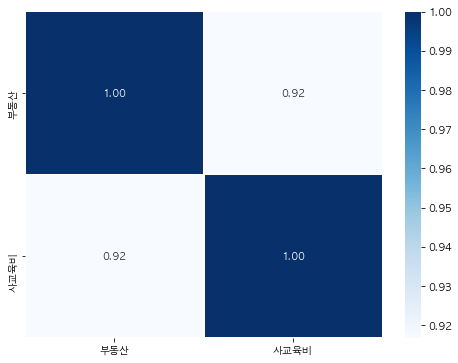

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(data=seoul.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')